In [32]:
if homedir() == "/Users/charlottehaley"
    base_dir = homedir() * "/Documents/Data/Xray/md_54_4b/"
    repo_dir = homedir() * "/Documents/Repos/laplaceinterpolation/"
else
    base_dir = homedir() * "/Research/BES_Project/Data/"
    repo_dir = homedir() * "/Research/BES_Project/Repo/laplaceinterpolation/"
end

include(repo_dir*"MaternKernelApproximation.jl")

Laplace3D_Grid (generic function with 1 method)

In [33]:
# Can we write a function that runs faster than return_boundary_nodes?

n1 = 3
n2 = 4
n3 = 5

matrix = [CartesianIndex(h,k,l) for h in 1:n1 for k in 1:n2 for l in 1:n3]
l1 = findall(x->(x[1] == 1)||(x[1] == n1),matrix)
l2 = findall(x->(x[2] == 1)||(x[2] == n2),matrix)
l3 = findall(x->(x[3] == 1)||(x[3] == n3),matrix)
lsearch(n1,n2,n3,matrix) = findall(x->(x[1] == 1)||(x[1] == n1)||(x[2] == 1)||(x[2] == n2)||(x[3] == 1)||(x[3] == n3),matrix)

@time [(h == 1)||(h == n1)||(k == 1)||(k == n2)||(l == 1)||(l == n3) for h in 1:n1 for k in 1:n2 for l in 1:n3]

@time lsearch(n1,n2,n3,matrix)

function boundaryindices(n1,n2,n3)
    list1a = 1:(n2*n3)
    list1b = (n1*n2*n3 - n2*n3 +1):n1*n2*n3

    list2a = mapreduce(x->collect(1:n3) .+ x, vcat, 0:(n3*n2):(n1*n2*n3-n1*n2-1))
    list2b = n1*n2*n3 .- list2a[end:-1:1] .+1

    list3a = 1:(n3):(n1*n2*n3)
    list3b = list3a .+ n2
    # return sort(vcat(collect(list1a),collect(list1b),collect(list2a),collect(list2b),collect(list3a),collect(list3b)))
    return (list1a, list1b, list2a, list2b, list3a, list3b)
end

@time boundaryindices(n1,n2,n3)

@time return_boundary_nodes(n1,n2,n3);

# Nope.

  0.099223 seconds (193.10 k allocations: 10.335 MiB)
  0.039613 seconds (109.64 k allocations: 5.463 MiB)
  0.085107 seconds (271.53 k allocations: 13.781 MiB)
  0.020769 seconds (28.76 k allocations: 1.525 MiB)


In [34]:
using TestImages, Colors, Plots, FileIO, JLD, BenchmarkTools

In [35]:
#2D Example: Mandrill

img = testimage("mandrill");

imgg = Gray.(img);

mat = convert(Array{Float64}, imgg)[1:256,1:512];
# This image is square

cent = [(100, 200), (200, 100), (200, 400)]
radius = 20;
xpoints = size(mat,1);
ypoints = size(mat,2);
epsilon = 0.2
restored_image, punched_image =  Matern2D(xpoints, ypoints, mat, epsilon, cent, radius);

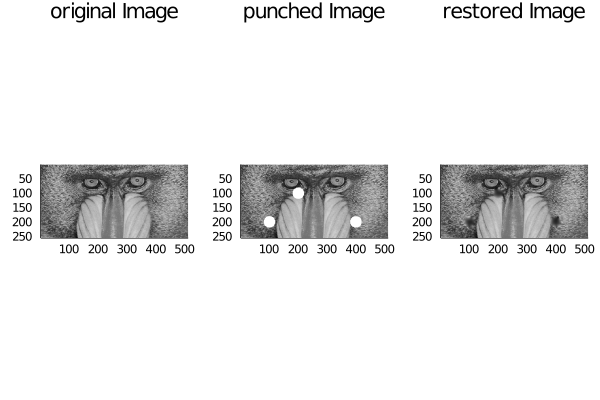

In [36]:
p1 = plot(Gray.(imgg[1:256,1:512]), title="original Image")
p2 = plot(Gray.(restored_image), title="restored Image")
p3 = plot(Gray.(punched_image), title="punched Image")

plot(p1,p3,p2,layout=(1,3),figuresize=(12,2))

In [ ]:
# BenchmarkTools.DEFAULT_PARAMETERS.seconds = 100;
# @benchmark Matern2D(xpoints, ypoints, mat, epsilon, cent, radius);

# obj = load("/Users/vishwasrao/Research/BES_Project/Repo/laplaceinterpolation/cat_bow.gif")
# obj_copy = load("/Users/vishwasrao/Research/BES_Project/Repo/laplaceinterpolation/cat_bow.gif")

# imgg = Gray.(obj);
# imgg_copy = Gray.(obj_copy);

# cent = [(50, 50,30), (50, 100,30), (50, 150,30), (100, 50, 30),
#     (100, 100,30), (100, 150, 30)];

# radius = 20;
# epsilon = 0.1;
# xpoints = size(imgg, 1);
# ypoints = size(imgg, 2);
# zpoints = size(imgg, 3);

# # @benchmark restored_image, punched_image  = Matern3D(xpoints, ypoints, zpoints, imgg, epsilon, cent, radius);
# print()
# BenchmarkTools.DEFAULT_PARAMETERS.seconds = 600;
# BenchmarkTools.DEFAULT_PARAMETERS.samples = 50;
# @benchmark Matern3D(xpoints, ypoints, zpoints, imgg, epsilon, cent, radius);

# restored_image = Gray.(restored_image);
# plot1 = plot(imgg[:,:,15], title = "Original Image");
# plot2 = plot(restored_image[:,:,15], title = "Restored Image");
# plot3 = plot(punched_image[:,:,15], title = "Punched Image");
# plot(plot1, plot3, plot2, layout = (1, 3), legend = false)

In [28]:
n1 = 300
n2 = 400

@time spdiagm_nonsquare(n1+1, n1, -1=>-ones(n1), 0=>ones(n1))

@time spdiagm(-1 => -ones(n1), 0 => ones(n2))[1:n2,1:n1]

  0.000044 seconds (29 allocations: 49.250 KiB)
  0.000060 seconds (38 allocations: 70.406 KiB)


400×300 SparseMatrixCSC{Float64,Int64} with 600 stored entries:
  [1  ,   1]  =  1.0
  [2  ,   1]  =  -1.0
  [2  ,   2]  =  1.0
  [3  ,   2]  =  -1.0
  [3  ,   3]  =  1.0
  [4  ,   3]  =  -1.0
  [4  ,   4]  =  1.0
  [5  ,   4]  =  -1.0
  [5  ,   5]  =  1.0
  [6  ,   5]  =  -1.0
  [6  ,   6]  =  1.0
  [7  ,   6]  =  -1.0
  ⋮
  [295, 294]  =  -1.0
  [295, 295]  =  1.0
  [296, 295]  =  -1.0
  [296, 296]  =  1.0
  [297, 296]  =  -1.0
  [297, 297]  =  1.0
  [298, 297]  =  -1.0
  [298, 298]  =  1.0
  [299, 298]  =  -1.0
  [299, 299]  =  1.0
  [300, 299]  =  -1.0
  [300, 300]  =  1.0
  [301, 300]  =  -1.0

In [30]:
using Laplacians

@time ∇²(n1,n2)
    
@time lap(grid2(n1,n2))

# Very nice!

┌ Info: Precompiling Laplacians [6f8e5838-0efe-5de0-80a3-5fb4f8dbb1de]
└ @ Base loading.jl:1278


  0.015357 seconds (103 allocations: 24.877 MiB)
  0.475159 seconds (1.23 M allocations: 126.876 MiB, 3.62% gc time)


120000×120000 SparseMatrixCSC{Float64,Int64} with 598600 stored entries:
  [1     ,      1]  =  2.0
  [2     ,      1]  =  -1.0
  [401   ,      1]  =  -1.0
  [1     ,      2]  =  -1.0
  [2     ,      2]  =  3.0
  [3     ,      2]  =  -1.0
  [402   ,      2]  =  -1.0
  [2     ,      3]  =  -1.0
  [3     ,      3]  =  3.0
  [4     ,      3]  =  -1.0
  [403   ,      3]  =  -1.0
  [3     ,      4]  =  -1.0
  ⋮
  [119997, 119997]  =  3.0
  [119998, 119997]  =  -1.0
  [119598, 119998]  =  -1.0
  [119997, 119998]  =  -1.0
  [119998, 119998]  =  3.0
  [119999, 119998]  =  -1.0
  [119599, 119999]  =  -1.0
  [119998, 119999]  =  -1.0
  [119999, 119999]  =  3.0
  [120000, 119999]  =  -1.0
  [119600, 120000]  =  -1.0
  [119999, 120000]  =  -1.0
  [120000, 120000]  =  2.0

In [40]:
n3 = 9

@time a_v = ∇²3d(n1,n2,n3)

# Uh oh, the Laplacians.jl package outruns us here. 
@time a_sp = lap(grid3(n1,n2,n3))

# The boundaries are all messed up, still
a_v

  0.000079 seconds (157 allocations: 57.953 KiB)
  0.000052 seconds (97 allocations: 57.719 KiB)


108×108 SparseMatrixCSC{Float64,Int64} with 606 stored entries:
  [1  ,   1]  =  6.0
  [2  ,   1]  =  -1.0
  [4  ,   1]  =  -1.0
  [13 ,   1]  =  -1.0
  [1  ,   2]  =  -1.0
  [2  ,   2]  =  6.0
  [3  ,   2]  =  -1.0
  [5  ,   2]  =  -1.0
  [14 ,   2]  =  -1.0
  [2  ,   3]  =  -1.0
  [3  ,   3]  =  6.0
  [6  ,   3]  =  -1.0
  ⋮
  [94 , 106]  =  -1.0
  [103, 106]  =  -1.0
  [106, 106]  =  6.0
  [107, 106]  =  -1.0
  [95 , 107]  =  -1.0
  [104, 107]  =  -1.0
  [106, 107]  =  -1.0
  [107, 107]  =  6.0
  [108, 107]  =  -1.0
  [96 , 108]  =  -1.0
  [105, 108]  =  -1.0
  [107, 108]  =  -1.0
  [108, 108]  =  6.0

In [ ]:
punch_holes_3D(centers, radius, xpoints, ypoints, zpoints)